### Imports

In [1]:
# !pip3 install ipywidgets
# !pip3 install matplotlib

In [2]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import random as rnd
import math
import time

### Bronnen

**Fast.ai**

+ [Practical Deep Learning for Coders](https://course.fast.ai/)
+ [Neural net foundations](https://course.fast.ai/Lessons/lesson3.html)

**CodingTrain**:

+ [Linear Regression with Gradient Descent](https://www.youtube.com/watch?v=L-Lsfu4ab74)
+ [Mathematics of Gradient Descent](https://www.youtube.com/watch?v=jc2IthslyzM)

# Deep Learning

### Preparation

In [3]:
#------------------------------------------

def preparePlot(t):
    
    fig, ax = plt.subplots()
    ax.set(xlim=[-10, 10], ylim=[-50, 400], xlabel='x', ylabel='y', title=t)

#------------------------------------------

def plotCurve(x, y, scatter):

    if scatter:
        
        plt.scatter(x, y)
        
    else:
        
        plt.plot(x, y, 'red')

#------------------------------------------

def showPlot():
    
    plt.show()

#------------------------------------------

In [4]:
x = [x for x in range(-10, 11, 1)]

print(x)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [5]:
# The answer to everything
rnd.seed(42)

a = 2
b = 3
c = -10

# Prepare random data
y = [a * x**2 + b * x + c for x in x]

# Mean
mu = 5

# Define standard deviation (spread)
sigma = 20

# Prepare random data
yNoise = [a * x**2 + b * x + c + rnd.gauss(mu, sigma) for x in x]

print(y)

[160, 125, 94, 67, 44, 25, 10, -1, -8, -11, -10, -5, 4, 17, 34, 55, 80, 109, 142, 179, 220]


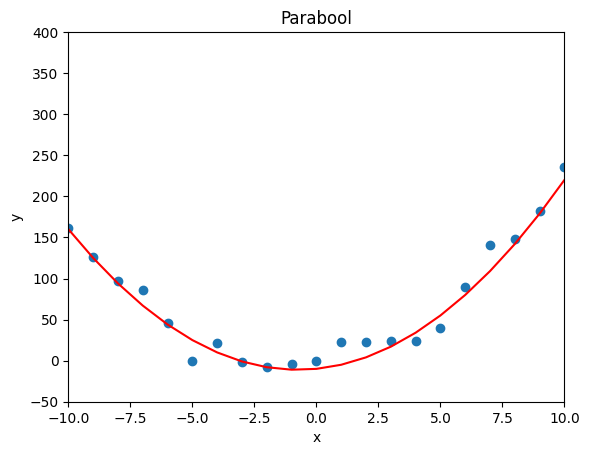

In [6]:
preparePlot("Parabool")
plotCurve(x,y, False)
plotCurve(x,yNoise, True)
showPlot()

## Doel: best fit maken

### ReLU: Rectified Linear Unit

In [7]:
#------------------------------------------

def relu(w, b, x):
    
    y = w * x + b
    
    if y > 0:
        
        
        return y
    
    else:
        
        return 0

#------------------------------------------

In [8]:
#------------------------------------------

def manualRelu(w, b):
    
    rlu = [relu(w, b, x) for x in x]
    
    preparePlot("ReLU")
    
    plotCurve(x, rlu, False)

#------------------------------------------

interact(manualRelu, w=(-30,30,0.1), b=(-100,100,0.1))

#------------------------------------------

interactive(children=(FloatSlider(value=0.0, description='w', max=30.0, min=-30.0), FloatSlider(value=0.0, des…

<function __main__.manualRelu(w, b)>

### Handmatige parabool fit met ReLU

In [9]:
#------------------------------------------

def mse(fit):
    
    sse = 0
    
    # Sum of squared errors
    for i in range(0, len(yNoise)):
        
        # Error = actual - predicted
        err = yNoise[i] - fit[i]
        sse += (err**2)
    
    # Mean squared error
    return sse / len(yNoise)

#------------------------------------------

def parabolaFit(w1, b1, w2, b2):
    
    fit = [relu(w1, b1, x) + relu(w2, b2, x) for x in x]
    
    preparePlot("Som van 2 ReLUs")
    
    plotCurve(x, fit, False)
    plotCurve(x, yNoise, True)
    
    showPlot()
    
    # Our indicator
    print(mse(fit))

#------------------------------------------
    
interact(parabolaFit, w1=(-50,50,0.01), b1=(-100,100,0.01), w2=(-50,50,0.01), b2=(-100,100,0.01))

#------------------------------------------

interactive(children=(FloatSlider(value=0.0, description='w1', max=50.0, min=-50.0, step=0.01), FloatSlider(va…

<function __main__.parabolaFit(w1, b1, w2, b2)>

### Gradient descent

initial cost:  9702.1711632593
w1Fit:  5.6250005574490425 b1Fit:  20.636176343964912 w2Fit:  -0.8472617270682241 b2Fit:  19.641158964947927
final cost:  4191.0056959452395


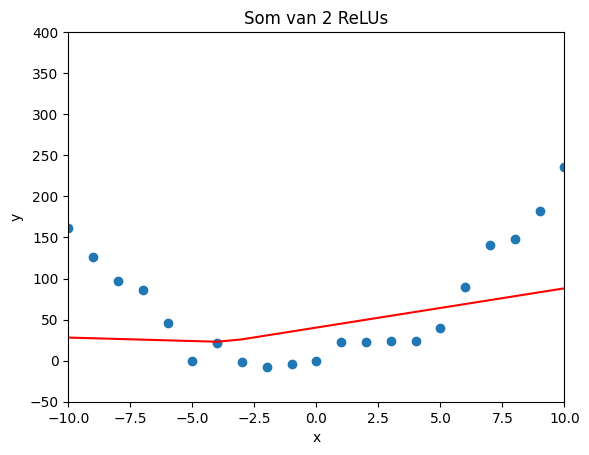

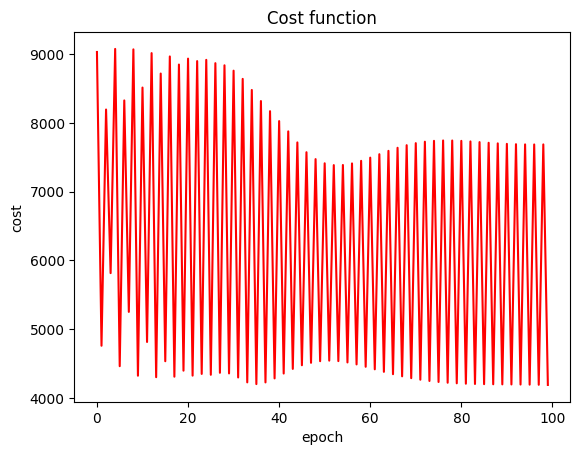

In [10]:
#------------------------------------------

# Learning iterations
epochs = 100

# Learning rate
learningRate = 1e-4

#------------------------------------------

# Initial values ("guess")
w1Fit = 0.0
b1Fit = 0.0
w2Fit = 0.0
b2Fit = 0.0

# Epochs counter
epoch = 0

#------------------------------------------

def cost(w1, b1, w2, b2):
    
    sse = 0
    
    # Sum of squared errors
    for i in range(0, len(yNoise)):
        
        # Use yhat = ReLU(w1 * x + b1) + ReLU(w2 * x + b2) + 
        yhat = relu(w1, b1, x[i]) + relu(w2, b2, x[i])
        
        # Use error = y - yhat
        err = yNoise[i] - yhat
        
        sse += (err**2)
    
    # Mean squared error
    return sse / len(yNoise)

#------------------------------------------

def gradientDescent(w1, b1, w2, b2):
    
    # The change of our weights and biases
    dw1 = 0
    db1 = 0
    
    dw2 = 0
    db2 = 0
    
    # Stochastic gradient descent
    for i in range(0, len(yNoise)):
    
        # Use yhat = ReLU(w1 * x + b1) + ReLU(w2 * x + b2)
        yhat = relu(w1, b1, x[i]) + relu(w2, b2, x[i])
        
        # Use error = y - yhat
        err = yNoise[i] - yhat

        # Gradient descent steps
        dw1 -= 2 * err * x[i]
        db1 -= 2 * err
        
        # Adjust with learn rate
        w1 -= learningRate * dw1
        b1 -= learningRate * db1
        
        # Use yhat = ReLU(w1 * x + b1) + ReLU(w2 * x + b2)
        yhat = relu(w1, b1, x[i]) + relu(w2, b2, x[i])
        
        # Use error = y - yhat
        err = yNoise[i] - yhat
        
        dw2 -= 2 * err * x[i]
        db2 -= 2 * err
        
        # Adjust with learn rate
        w2 -= learningRate * dw2
        b2 -= learningRate * db2
    
    return w1, b1, w2, b2

#------------------------------------------

def plotFit(w1, b1, w2, b2):
    
    fit = [relu(w1, b1, x) + relu(w2, b2, x) for x in x]
    
    preparePlot("Som van 2 ReLUs")
    
    plotCurve(x, fit, False)
    plotCurve(x, yNoise, True)
    
    showPlot()

#------------------------------------------

# Inital cost
mse = cost(w1Fit, b1Fit, w2Fit, b2Fit)

print("initial cost: ", cost(w1Fit, b1Fit, w2Fit, b2Fit))

#------------------------------------------

epochList = []
costList = []

while epoch < epochs:
    
    # print("epoch: ", epoch)
    
    epochList.append(epoch)
    
    w1Fit, b1Fit, w2Fit, b2Fit = gradientDescent(w1Fit, b1Fit, w2Fit, b2Fit)
    
    # print("cost: ", cost(w1Fit, b1Fit, w2Fit, b2Fit))
    
    costList.append(cost(w1Fit, b1Fit, w2Fit, b2Fit))
    
    epoch += 1
    
#------------------------------------------

print("w1Fit: ", w1Fit, "b1Fit: ", b1Fit, "w2Fit: ", w2Fit, "b2Fit: ", b2Fit)
print("final cost: ", cost(w1Fit, b1Fit, w2Fit, b2Fit))

plotFit(w1Fit, b1Fit, w2Fit, b2Fit)


fig, ax = plt.subplots()
ax.set(xlabel='epoch', ylabel='cost', title="Cost function")

plt.plot(epochList, costList, 'red')
plt.show()